**Chapter3 Unsupervsied Learning**

**3.3 Data Perpocessing and Configure Data Scale**

In [1]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


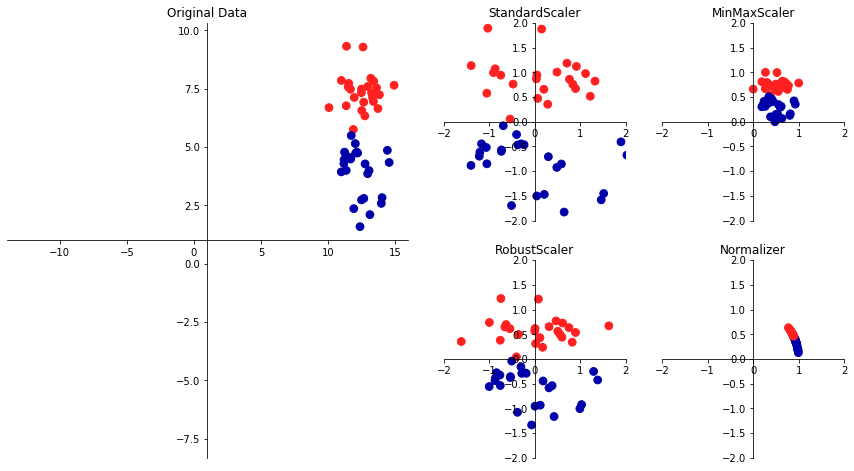

In [2]:
mglearn.plots.plot_scaling()

1. StandardScaler: 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 한다. 하지만 이 방법은 **특성의 최소, 최대값의 크기를 제한하지 않는다.**
2. RobustScaler: 특성들이 같은 스케일을 갖게 된다는 통계적 측면에서는 StandardScaler와 비슷하다. 하지만 **평균과 분산 대신,** ***중간값과 사분위값***을 사용한다. 
3. MinMaxScaler: 모든 특성이 **정확히 0과 1 사이에 위치**하도록 데이터를 변경한다. 2차원 데이터셋일 경우, 모든 데이터가 x 축과 0과 1, y 축의 0과 1 사이의 사각 영역에 담게 된다.
4. Normalizer: 이는 **특성 벡터의 유클리디언 길이가 1이 되도록 데이터 포인트를 조정**한다. 이러한 정규화는 특성 벡터의 길이는 상관없고 데이터의 방향(또는 각도)만이 중요할 때 이용된다.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
# Transform Data
X_train_scaled = scaler.transform(X_train)

# 스케일이 조정된 후, 데이터셋의 속성을 출력.
print("변환된 후 크기: {}".format(X_train.min(axis=0)))
print("스케일 조정 전, 특성별 최소값: {}\n".format(X_train.min(axis=0)))
print("스케일 조정 전, 특성별 최대값: {}\n".format(X_train.max(axis=0)))
print("스케일 조정 후, 특성별 최소값: {}\n".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후, 특성별 최대값: {}\n".format(X_train_scaled.max(axis=0)))


변환된 후 크기: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전, 특성별 최소값: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]

스케일 조정 전, 특성별 최대값: [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]

스케일 조정 후, 특성별 최소값: [0. 0. 0. 0. 

In [8]:
# Test Data 
X_test_scaled = scaler.transform(X_test)

In [9]:
# 중요한것은, transform method는 테스트 세트의 최소값과 범위를 사용하지 않고, 항상 훈련 세트의 최소값을 빼교, 훈련세트의 범위로 나눈다. 
# 따라서, X_test_scaled의 값은, 0과 1사이에 존재하지 않는 값들도 존재한다.

**3.3.3 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0.5, 1.0, 'Scaled with Test Set_Badly Scaled')

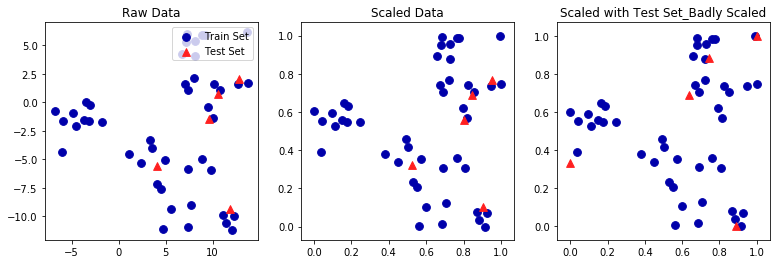

In [12]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
               c=mglearn.cm2(0), label='Train Set', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2(1), label="Test Set", s=60)
axes[0].legend(loc='upper right')
axes[0].set_title('Raw Data')

# MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label='Train Set', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2(1), label='Test Set', s=60)
axes[1].set_title('Scaled Data')

# Test Set의 스케일을 따로 조정
# 테스트 셋의 최솟값은 0, 그리고 1
# 이는 예제를 위함. 절대로 이렇게 해서는 안된다.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label='Train Set', s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2(1), label='Test Set', s=60)
axes[2].set_title('Scaled with Test Set_Badly Scaled')

첫번째 그래프와 두번째 그래프는, 축의 눈금을 제외하고는 같다.

하지만, 잘못 스케일한 경우, 훈련세트와 테스트 세트 모두 최소값과 최대값이 0과 1이다. 

**단축 메서드와 효율적인 방법**

- 보통 어떤 데이터셋에 fit을 적용하면 transform을 호출. 
- 이보다, 효율적인 방법은 fit_transform